## Exercise

1. Load the dataset **`california_housing_train.csv`**.
2. Use the provided model architecture to train the data.
3. Monitor and record both **training loss** and **validation loss** during the training process.
4. Plot the loss curves to visually compare the model’s performance on training and validation data.

### Notes
- Split the dataset into **training** and **validation** sets before training.
- Watch for signs of **overfitting** or **underfitting** in the loss curves.
- Report your final training and validation losses at the end of training.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch

df = pd.read_csv('/content/sample_data/california_housing_test.csv')
x = df.drop(['median_house_value'], axis= 1)
y = df['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 42)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

x_train_tensor = torch.tensor(x_train.values, dtype = torch.float32, device = device)
y_train_tensor = torch.tensor(y_train.values.reshape(-1,1), dtype = torch.float32, device = device)

x_test_tensor = torch.tensor(x_test.values, dtype = torch.float32, device = device)
y_test_tensor = torch.tensor(y_test.values.reshape(-1,1), dtype = torch.float32, device = device)

x_mu = x_train_tensor.mean(axis = 0)
x_std = x_train_tensor.std(axis = 0)
x_train_tensor_scaled = (x_train_tensor - x_mu)/(x_std)

y_mu = y_train_tensor.mean()
y_std = y_train_tensor.std()
y_train_tensor_scaled = (y_train_tensor - y_mu)/(y_std)

x_test_tensor_scaled = (x_test_tensor - x_mu)/(x_std)
y_test_tensor_scaled = (y_test_tensor - y_mu)/(y_std)

In [ ]:
from torch import nn

class ManualRegresion(nn.Module):
  def __init__(self, input_dim):
    super().__init__()
    self.fc1 = nn.Linear(input_dim, 5)
    self.fc2 = nn.Linear(5, 3)
    self.fc3 = nn.Linear(3,1)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)
    return x


Epoch 1: train loss = 1.1758301258087158, val loss = 1.2026729583740234
Epoch 500: train loss = 0.6692968010902405, val loss = 0.6106895804405212
Epoch 1000: train loss = 0.462842732667923, val loss = 0.42250755429267883
Epoch 1500: train loss = 0.38797083497047424, val loss = 0.36890900135040283
Epoch 2000: train loss = 0.36997294425964355, val loss = 0.3549588620662689
Epoch 2500: train loss = 0.357573002576828, val loss = 0.34536275267601013
Epoch 3000: train loss = 0.3462226688861847, val loss = 0.33791372179985046
Epoch 3500: train loss = 0.33817169070243835, val loss = 0.3301675617694855
Epoch 4000: train loss = 0.3334326148033142, val loss = 0.32481616735458374
Epoch 4500: train loss = 0.3305545747280121, val loss = 0.3209776282310486
Epoch 5000: train loss = 0.32850056886672974, val loss = 0.31756725907325745
Epoch 5500: train loss = 0.32700973749160767, val loss = 0.31469008326530457
Epoch 6000: train loss = 0.32534924149513245, val loss = 0.3103427290916443
Epoch 6500: train 

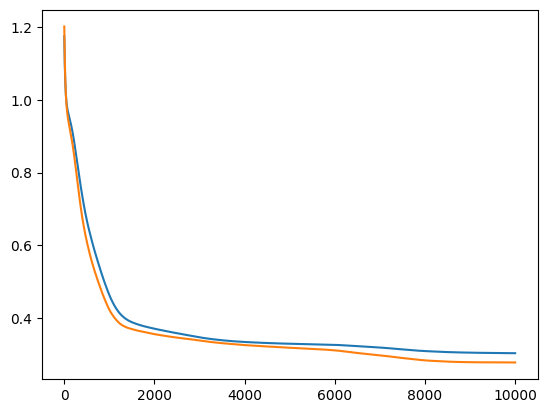

In [ ]:
from torch import optim
import matplotlib.pyplot as plt

torch.manual_seed(42)
lr = .01
input_dim = x_train_tensor.shape[1]
model = ManualRegresion(input_dim).to(device)
optimizer = optim.SGD(model.parameters(), lr = lr)
loss_fn = nn.MSELoss()
n_epochs = 10000
train_losses = []
val_losses = []

for epoch in range(n_epochs):
  model.train()
  optimizer.zero_grad()
  y_pred = model(x_train_tensor_scaled)
  loss = loss_fn(y_train_tensor_scaled, y_pred)
  loss.backward()
  optimizer.step()
  train_losses.append(loss.detach().cpu().item())

  model.eval()
  with torch.no_grad():
    y_pred = model(x_test_tensor_scaled)
    test_loss = loss_fn(y_test_tensor_scaled, y_pred)
    val_losses.append(test_loss.cpu().item())


  if (epoch + 1) % 500 == 0 or epoch == 0:
    print(f'Epoch {epoch + 1}: train loss = {loss.detach().cpu().item()}, val loss = {test_loss.cpu().item()}')

plt.plot(range(n_epochs), train_losses)
plt.plot(range(n_epochs), val_losses)
plt.show()

### Exercise: Build a Deep Model to Demonstrate Overfitting

**Instructions:**

You will create a deep fully-connected neural network for a regression task.  
The architecture will be intentionally large compared to the dataset size so that overfitting can be observed.

**Model Architecture:**
- **Input layer**: number of neurons equal to the number of input features (`input_dim`).
- **Hidden Layer 1**: 256 neurons, ReLU activation.
- **Hidden Layer 2**: 128 neurons, ReLU activation.
- **Hidden Layer 3**: 64 neurons, ReLU activation.
- **Hidden Layer 4**: 32 neurons, ReLU activation.
- **Hidden Layer 5**: 16 neurons, ReLU activation.
- **Output Layer**: 1 neuron (no activation).

**Steps:**
1. Implement the above architecture using `torch.nn.Module`.
2. Train the model **only on the first 100 samples** of the training dataset (`X_train`, `y_train`).
3. Train for a sufficient number of epochs (e.g., 5000) to let the model memorize the training data.
4. Record both **training loss** and **validation loss** over epochs.
5. Plot both curves to observe:
   - Training loss decreasing close to zero.
   - Validation loss increasing after some point (a clear sign of overfitting).

**Expected Output:**
- A plot with two curves:  
  - **Training loss** continuously decreasing.  
  - **Validation loss** starting low but increasing after some epochs.
- Clear evidence that the model has memorized the small training set instead of generalizing.


In [ ]:
class RegressionLin(nn.Module):
    def __init__(self, input_dim: int):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 16)
        self.fc6 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.relu(self.fc5(x))
        x = self.fc6(x)
        return x


In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
epochs = 5000
train_losses = []
val_losses = []
for epoch in range(1, epochs + 1):
    model.train()
    optimizer.zero_grad()
    preds = model(x_train_tensor_scaled)
    loss = criterion(preds, y_train_tensor_scaled)
    loss.backward()
    optimizer.step()
    model.eval()
    with torch.no_grad():
        val_pred = model(x_test_tensor_scaled)
        val_loss = criterion(val_pred, y_test_tensor_scaled)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    # هر از گاهی چاپ لاگ
    if epoch % 500 == 0 or epoch == 1:
        print(f"Epoch {epoch:4d} | train MSE: {loss.item():.6f} | test MSE: {val_loss.item():.6f}")

Epoch    1 | train MSE: 0.302495 | test MSE: 0.276632
Epoch  500 | train MSE: 0.288644 | test MSE: 0.271405
Epoch 1000 | train MSE: 0.280153 | test MSE: 0.267623
Epoch 1500 | train MSE: 0.279940 | test MSE: 0.267933
Epoch 2000 | train MSE: 0.279642 | test MSE: 0.267951
Epoch 2500 | train MSE: 0.279304 | test MSE: 0.269532
Epoch 3000 | train MSE: 0.279215 | test MSE: 0.270611
Epoch 3500 | train MSE: 0.278602 | test MSE: 0.270343
Epoch 4000 | train MSE: 0.278223 | test MSE: 0.270675
Epoch 4500 | train MSE: 0.278028 | test MSE: 0.272124
Epoch 5000 | train MSE: 0.276414 | test MSE: 0.272133


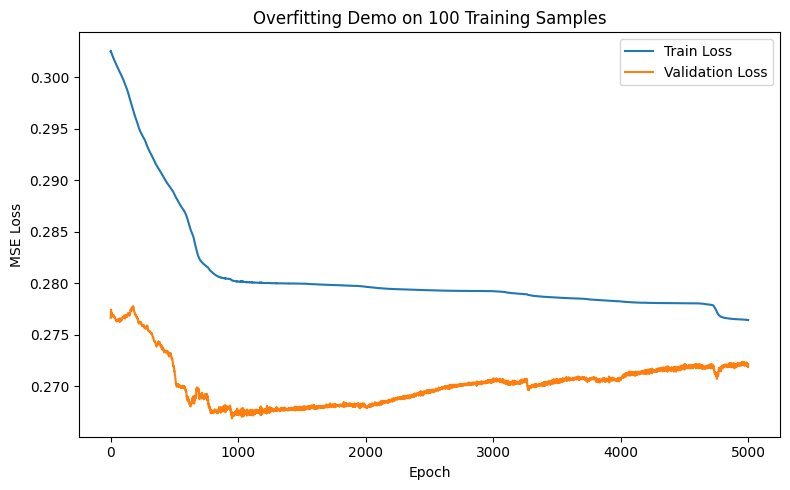

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Overfitting Demo on 100 Training Samples")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
class RegressionLinOneHidden(nn.Module):
    def __init__(self, input_dim: int):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 1)
        # self.fc2 = nn.Linear(256, 1)
        # self.relu = nn.ReLU()
    def forward(self, x):
        x = self.fc1(x)
        return x


### Exercise: Build a Simple Model to Demonstrate Underfitting

**Instructions:**

You will create an extremely simple neural network for a regression task in order to observe **underfitting**.

**Model Architecture:**
- **Input Layer**: number of neurons equal to the number of input features (`input_dim`).
- **Output Layer**: 1 neuron (no hidden layers, no activation function).

**Steps:**
1. Implement the above architecture using `torch.nn.Module`.
2. Train the model on the **entire training dataset** (no sample limitation).
3. Use the same training procedure as before (same optimizer and loss function), but **train for fewer epochs** than in the previous exercises.
4. Record both **training loss** and **validation loss** over epochs.
5. Plot both curves to observe:
   - Training loss remains relatively high.
   - Validation loss also remains high.
   - Both indicate that the model is too simple to capture the complexity of the data (underfitting).

**Expected Output:**
- A loss plot showing minimal improvement over epochs.
- Similar loss values for both training and validation sets, but both being higher than desired.



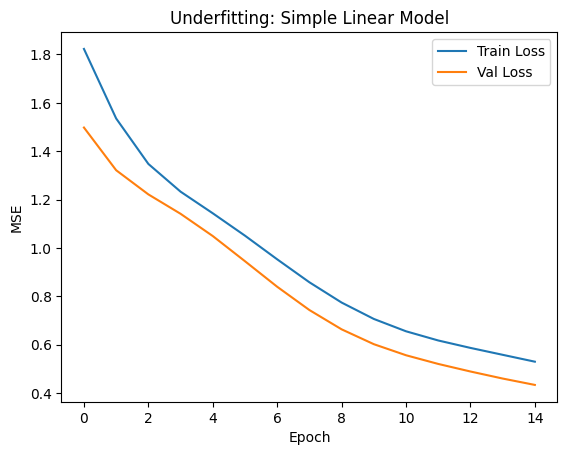

In [ ]:
model = RegressionLinOneHidden(input_dim=x_train_tensor_scaled.shape[1]).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.05)

train_losses, val_losses = [], []
epochs = 15
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_train_tensor_scaled)
    loss = criterion(outputs, y_train_tensor_scaled)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(x_test_tensor_scaled)
        val_loss = criterion(val_outputs, y_test_tensor_scaled)
        val_losses.append(val_loss.item())

plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Underfitting: Simple Linear Model")
plt.legend()
plt.show()